In [9]:
#importing models
import numpy as np
import pandas as pd 

train = pd.read_csv('/content/drive/My Drive/HHHHHH/train.csv')
test  = pd.read_csv('/content/drive/My Drive/HHHHHH/test.csv')
train.head()

train.shape

#Feature Selection Using Scikit Learn
#Tree based Feature selection

import sklearn 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
features = train.iloc[:,0:562]
label = train["Activity"]
clf = ExtraTreesClassifier()
clf = clf.fit(features,label)
model = SelectFromModel(clf,prefit=True)
New_features = model.transform(features)
print(New_features.shape)

#L1 based feature selection

from sklearn.svm import LinearSVC
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(features, label)
model_2 = SelectFromModel(lsvc, prefit=True)
New_features_2 = model_2.transform(features)
print(New_features_2.shape)

# Loading Models 

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
Classifiers = [DecisionTreeClassifier(),RandomForestClassifier(n_estimators=200),GradientBoostingClassifier(n_estimators=200)]


#Without Feature Selection 

from sklearn.metrics import accuracy_score
import timeit
test_features= test.iloc[:,0:562]
Time_1=[]
Model_1=[]
Out_Accuracy_1=[]

for clf in Classifiers:
    start_time = timeit.default_timer()
    fit=clf.fit(features,label)
    pred=fit.predict(test_features)
    elapsed = timeit.default_timer() - start_time
    Time_1.append(elapsed)
    Model_1.append(clf.__class__.__name__)
    Out_Accuracy_1.append(accuracy_score(test['Activity'],pred))


#tree based feature selection
test_features= model.transform(test.iloc[:,0:562])

Time_2=[]
Model_2=[]
Out_Accuracy_2=[]

for clf in Classifiers:
    start_time = timeit.default_timer()
    fit=clf.fit(New_features,label)
    pred=fit.predict(test_features)
    elapsed = timeit.default_timer() - start_time
    Time_2.append(elapsed)
    Model_2.append(clf.__class__.__name__)
    Out_Accuracy_2.append(accuracy_score(test['Activity'],pred))

#L1 based feature selection

test_features= model_2.transform(test.iloc[:,0:562])

Time_3=[]
Model_3=[]
Out_Accuracy_3=[]

for clf in Classifiers:
    start_time = timeit.default_timer()
    fit=clf.fit(New_features_2,label)
    pred=fit.predict(test_features)
    elapsed = timeit.default_timer() - start_time
    Time_3.append(elapsed)
    Model_3.append(clf.__class__.__name__)
    Out_Accuracy_3.append(accuracy_score(test['Activity'],pred))


#fittng classifier
# Loading Models 

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
Classifiers = [DecisionTreeClassifier(),RandomForestClassifier(n_estimators=200),GradientBoostingClassifier(n_estimators=200)]


#Without Feature Selection 

from sklearn.metrics import accuracy_score
import timeit
test_features= test.iloc[:,0:562]
Time_1=[]
Model_1=[]
Out_Accuracy_1=[]

for clf in Classifiers:
    start_time = timeit.default_timer()
    fit=clf.fit(features,label)
    pred=fit.predict(test_features)
    elapsed = timeit.default_timer() - start_time
    Time_1.append(elapsed)
    Model_1.append(clf.__class__.__name__)
    Out_Accuracy_1.append(accuracy_score(test['Activity'],pred))
    
#tree based feature selection on test features

test_features= model.transform(test.iloc[:,0:562])

Time_2=[]
Model_2=[]
Out_Accuracy_2=[]

for clf in Classifiers:
    start_time = timeit.default_timer()
    fit=clf.fit(New_features,label)
    pred=fit.predict(test_features)
    elapsed = timeit.default_timer() - start_time
    Time_2.append(elapsed)
    Model_2.append(clf.__class__.__name__)
    Out_Accuracy_2.append(accuracy_score(test['Activity'],pred))

#L1 based feature selection on test features

test_features= model_2.transform(test.iloc[:,0:562])

Time_3=[]
Model_3=[]
Out_Accuracy_3=[]

for clf in Classifiers:
    start_time = timeit.default_timer()
    fit=clf.fit(New_features_2,label)
    pred=fit.predict(test_features)
    elapsed = timeit.default_timer() - start_time
    Time_3.append(elapsed)
    Model_3.append(clf.__class__.__name__)
    Out_Accuracy_3.append(accuracy_score(test['Activity'],pred))

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

ind =  np.arange(3)   # the x locations for the groups
width = 0.1       # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(ind, Out_Accuracy_1, width, color='r')
rects2 = ax.bar(ind + width, Out_Accuracy_2, width, color='y')
rects3 = ax.bar(ind + width + width ,Out_Accuracy_3, width, color='b')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Models and Selection Process')
ax.set_xticks(ind + width)
ax.set_xticklabels(Model_3,rotation=45)
plt.show()

    

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-1.0,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0

(7352, 107)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [10]:
train.shape

(7352, 563)

(7352, 154)


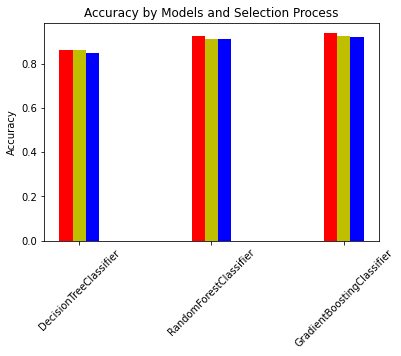